In [14]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [15]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [16]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [17]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [18]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [19]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [20]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [21]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [22]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [23]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

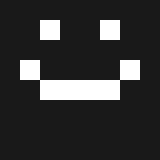

In [24]:

init_patern = np.array([
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1,0.1,0.1, 1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1, 1,0.1,0.1,0.1,0.1, 1,0.1],
        [0.1,0.1, 1, 1, 1, 1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
    ])
binary_array_to_png_and_display(init_patern,scale_factor=20)

init_patern_vec = feature_map(init_patern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.69260468 0.09810749 0.5190962 ]
  [0.64163773 0.78195499 0.31735607]
  [0.97419476 0.6575679  0.69607678]
  [0.6469422  0.70449827 0.65849039]
  [0.43035215 0.049679   0.53583773]
  [0.51942197 0.84691462 0.38526911]
  [0.77438077 0.43593882 0.60418536]
  [0.4519529  0.93996686 0.63246484]]

 [[0.74032177 0.38735898 0.97196072]
  [0.42486176 0.96720983 0.86782741]
  [0.98417436 0.34230441 0.49276605]
  [0.78528097 0.87505073 0.17427151]
  [0.94427932 0.92380506 0.91399295]
  [0.81756698 0.91210402 0.17891315]
  [0.03856329 0.30854025 0.1855958 ]
  [0.27619419 0.3775025  0.1002031 ]]

 [[0.19421003 0.50333686 0.65748528]
  [0.4062

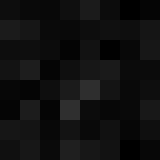

Current loss: 0.3948195720833201


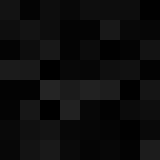

Current loss: 0.26941067300111277


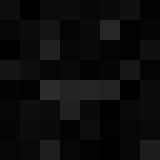

Current loss: 0.2076726707653752


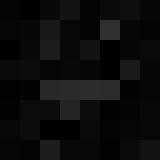

Current loss: 0.15753179542876572


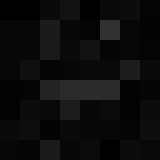

Current loss: 0.12656206566800499


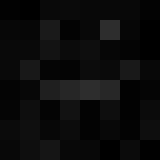

Current loss: 0.10563611280024676


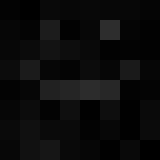

Current loss: 0.09059833110566928


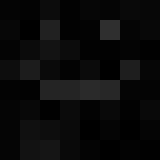

Current loss: 0.07300199391162498


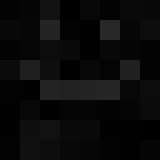

Current loss: 0.06636373196922807


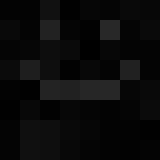

Current loss: 0.05676607023455149


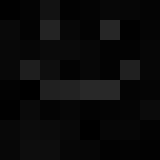

Current loss: 0.04932058212231938


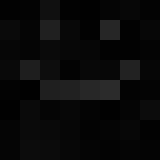

Current loss: 0.04461879718235284


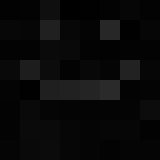

Current loss: 0.039121816136399534


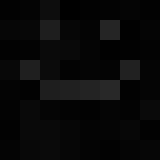

Current loss: 0.034811268289884345


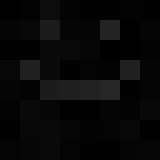

Current loss: 0.03226272269847286


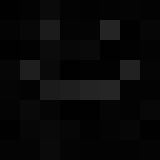

Current loss: 0.02973515748185329


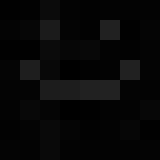

Current loss: 0.026734293712587287


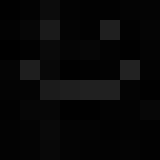

Current loss: 0.023976081410640893


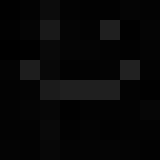

Current loss: 0.0220138668596227


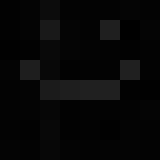

Current loss: 0.02049391317257221


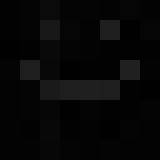

Current loss: 0.019428221260436973


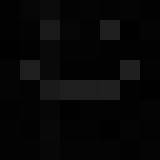

Current loss: 0.018715144748201018


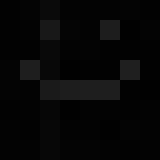

Current loss: 0.01821595294402978


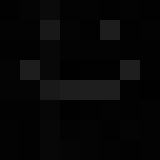

Current loss: 0.017722842603386302


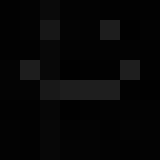

Current loss: 0.017331185161590046


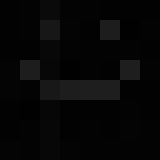

Current loss: 0.016815799667565412


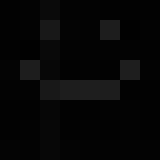

Current loss: 0.01647789095697405


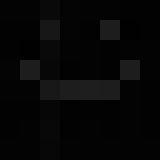

Current loss: 0.016214806189762343


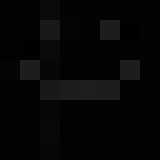

Current loss: 0.016011798451176174


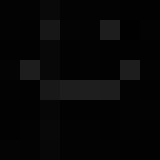

Current loss: 0.015862894955943285


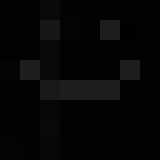

Current loss: 0.015763927562162605


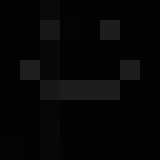

Current loss: 0.015685745405121687


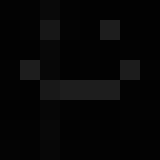

Current loss: 0.01562907463851626


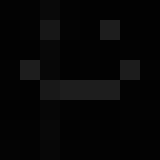

Current loss: 0.015595182889961867


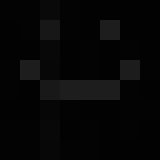

Current loss: 0.015565124616839232


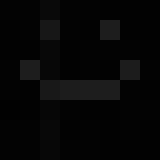

Current loss: 0.015518428578338073


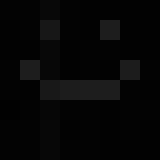

Current loss: 0.015448205911113844


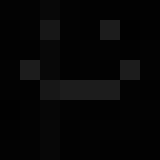

Current loss: 0.015369420923452726


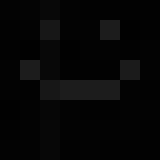

Current loss: 0.015298488929510579


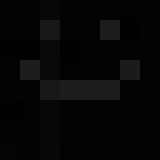

Current loss: 0.015203050914691651


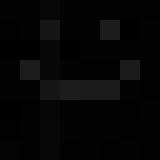

Current loss: 0.015106984153416159


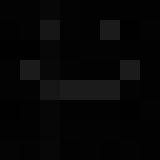

Current loss: 0.014973069733202338


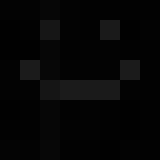

Current loss: 0.01477952528663884


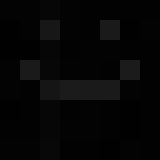

Current loss: 0.014552032848296426


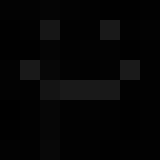

Current loss: 0.01438480226397032


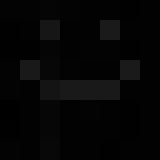

Current loss: 0.014165352557301114


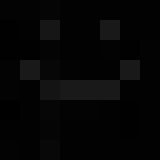

Current loss: 0.013840135090881112


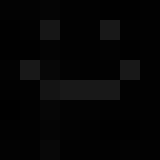

Current loss: 0.013356569628719672


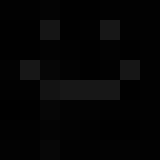

Current loss: 0.012881553325089334


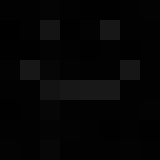

Current loss: 0.012514479484017182


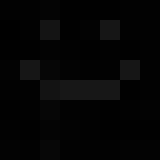

Current loss: 0.012080483132878683


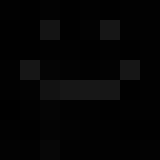

Current loss: 0.011538637326120482


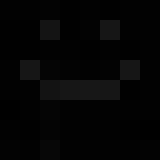

Current loss: 0.010956600823956997


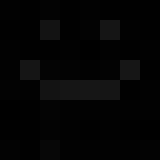

Current loss: 0.010286883800535773


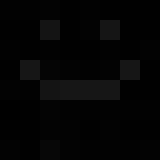

Current loss: 0.009619137083978768


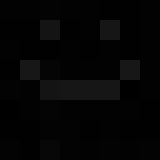

Current loss: 0.00875809947120021


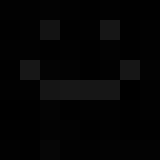

Current loss: 0.00810509284262384


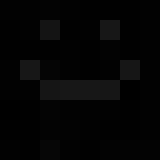

Current loss: 0.007522930277262252


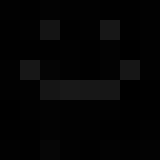

Current loss: 0.006839136894882913


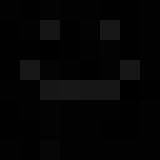

Current loss: 0.005858792838557392


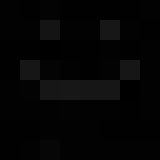

Current loss: 0.004791040125220247


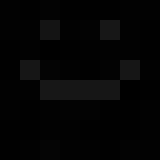

Current loss: 0.004577544049792381


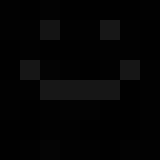

Current loss: 0.004280636187299902


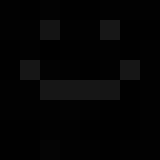

Current loss: 0.0039044604426474727


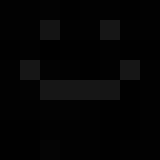

Current loss: 0.003554253758203396


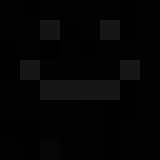

Current loss: 0.0032954060833018106


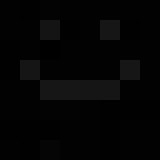

Current loss: 0.003071193476847145


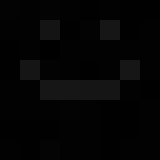

Current loss: 0.0028304843994235718


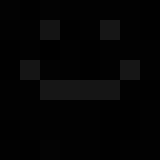

Current loss: 0.0026481414297826467


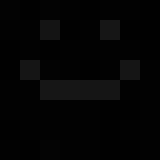

Current loss: 0.002498644244265824


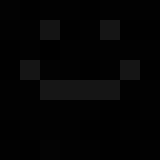

Current loss: 0.002312520118865957


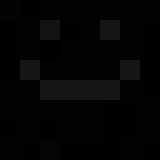

Current loss: 0.0021619962925557568


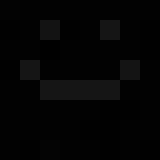

Current loss: 0.002005473260676238


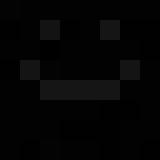

Current loss: 0.0018624374911669905


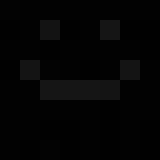

Current loss: 0.0016772198194756616


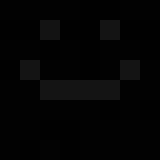

Current loss: 0.0014673012313624056


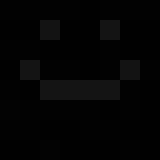

Current loss: 0.001304423864663784


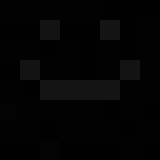

Current loss: 0.0011100563425316956


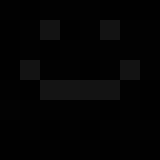

Current loss: 0.0009740540712321888


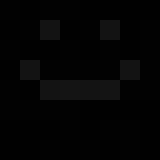

Current loss: 0.0008861762539327245


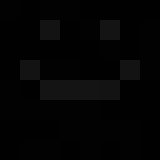

Current loss: 0.0007968797793431737


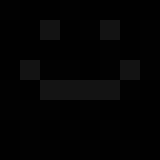

Current loss: 0.0007146206041582781


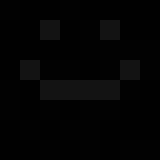

Current loss: 0.0006097032573737504


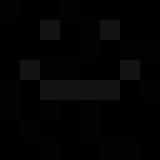

Current loss: 0.0005346374510997176


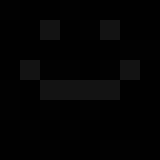

Current loss: 0.00045615145533939305


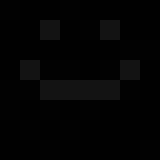

Current loss: 0.00039226631214528407


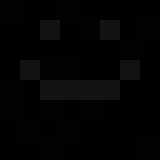

Current loss: 0.00030357573018213735


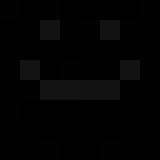

Current loss: 0.0002214917077274503


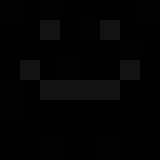

Current loss: 0.0001838556243860534


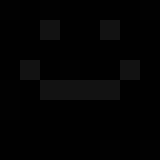

Current loss: 0.00016048198398821434


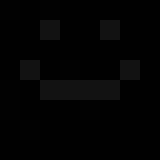

Current loss: 0.00014581932957780097


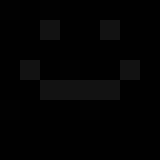

Current loss: 0.0001339829122255498


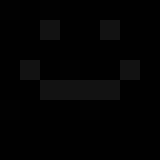

Current loss: 0.00012272115739497824


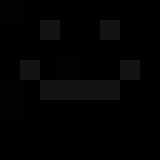

Current loss: 0.00010875991699699217


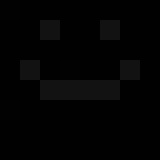

Current loss: 9.053870016628718e-05


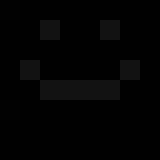

Current loss: 7.85928859141638e-05


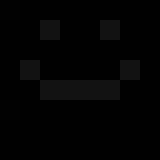

Current loss: 6.875012615648046e-05


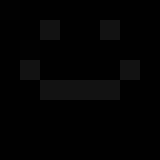

Current loss: 5.966653742206507e-05


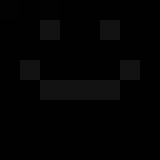

Current loss: 4.9484528271137584e-05


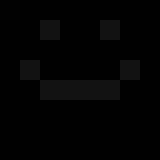

Current loss: 4.124882992939671e-05


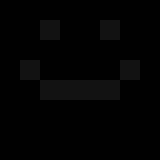

Current loss: 3.2309453648515785e-05


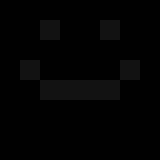

Current loss: 2.3162320268999004e-05


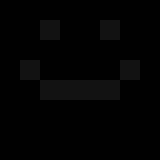

Current loss: 1.8599847035227768e-05


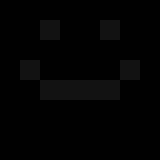

Current loss: 1.5991205301935096e-05


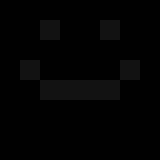

Current loss: 1.3801564186399773e-05


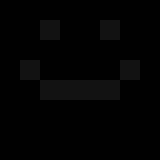

Current loss: 1.089224507222486e-05


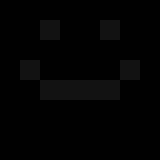

Current loss: 7.628928679337399e-06


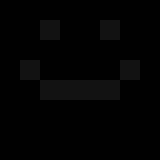

Current loss: 5.504204329764839e-06


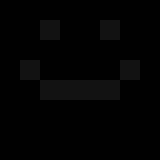

Current loss: 4.118134064423629e-06


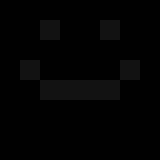

Current loss: 3.1113606585586595e-06


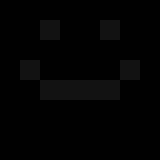

Current loss: 2.336756687482122e-06


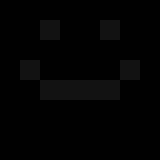

Current loss: 1.893325878299379e-06


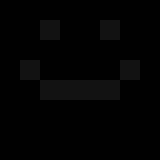

Current loss: 1.6013797875524816e-06


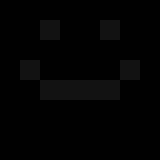

Current loss: 1.348660300326543e-06


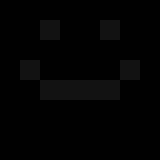

Current loss: 1.107654225895871e-06


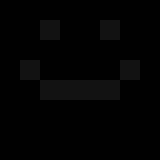

Current loss: 9.122817449247478e-07


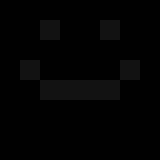

Current loss: 7.370736130329902e-07


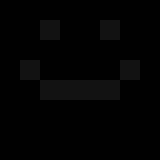

Current loss: 5.583055272539994e-07


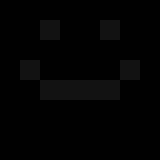

Current loss: 4.2347769613204633e-07


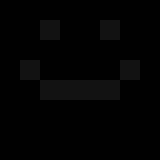

Current loss: 3.478996192241013e-07


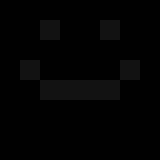

Current loss: 3.14277677992969e-07


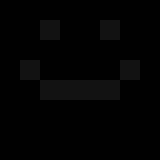

Current loss: 2.942215822088201e-07


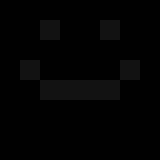

Current loss: 2.719618353852482e-07


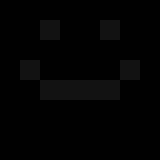

Current loss: 2.4335003256936716e-07


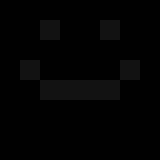

Current loss: 2.0939513400985987e-07


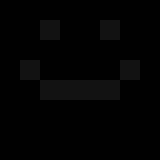

Current loss: 1.766570550953972e-07


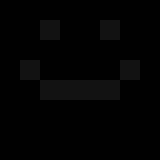

Current loss: 1.5323793955968057e-07


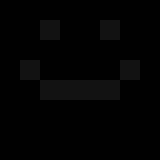

Current loss: 1.4017681804201487e-07


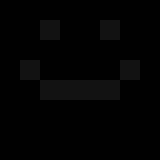

Current loss: 1.3289442235553395e-07


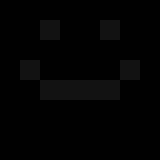

Current loss: 1.2730891996159954e-07


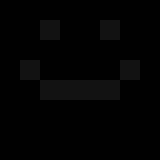

Current loss: 1.2131084647926116e-07


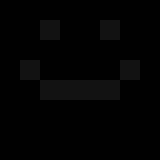

Current loss: 1.1420352685753699e-07


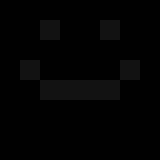

Current loss: 1.0702252195571305e-07


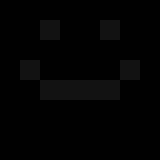

Current loss: 1.0154559759723014e-07


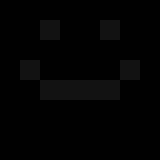

Current loss: 9.757790431219604e-08


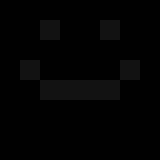

Current loss: 9.362469777229876e-08


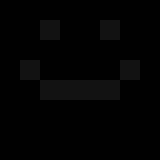

Current loss: 8.850304078489302e-08


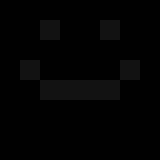

Current loss: 8.29127858592571e-08


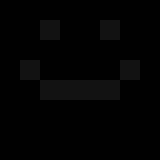

Current loss: 7.855518202593004e-08


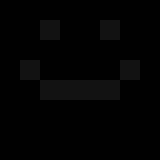

Current loss: 7.573686278128378e-08


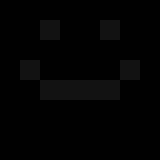

Current loss: 7.313668859421085e-08


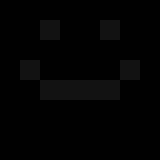

Current loss: 6.96041750902765e-08


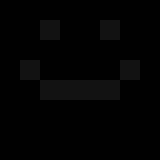

Current loss: 6.493389848039044e-08


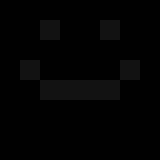

Current loss: 6.015206333032097e-08


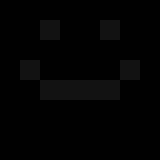

Current loss: 5.614008147247773e-08


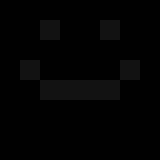

Current loss: 5.262002988892789e-08


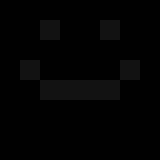

Current loss: 4.894533645050103e-08


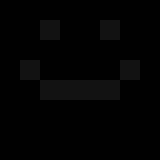

Current loss: 4.52474570034056e-08


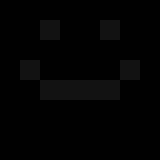

Current loss: 4.22789266929513e-08


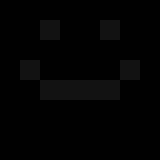

Current loss: 4.001871767300713e-08


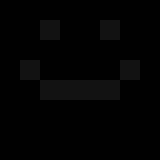

Current loss: 3.761832434445722e-08


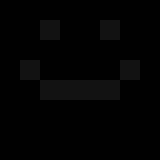

Current loss: 3.425390449063315e-08


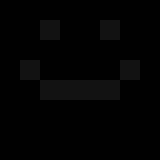

Current loss: 2.992497349918466e-08


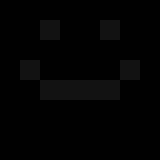

Current loss: 2.5755476085187468e-08


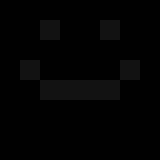

Current loss: 2.2772260521719545e-08


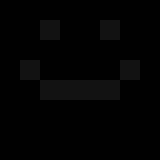

Current loss: 2.0419493096390795e-08


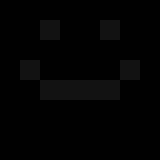

Current loss: 1.7612518221632456e-08


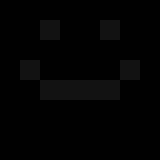

Current loss: 1.389369930215878e-08


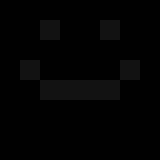

Current loss: 1.0009853945724956e-08


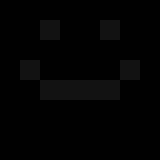

Current loss: 7.368243126748553e-09


In [25]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)


param_updated = None


# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(init_patern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1-score

def callback(params):
    global param_updated

    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    param_updated = weights_p1
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    loss = objective(params)
    print("Current loss:",loss)
    Threshold = 0.01
    # return False
    # if loss<Threshold:
    #     print("Tuned with threshod : ",Threshold)
    #     return True

    

# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [26]:
print(param_updated)

[[[ 0.69260347  0.54196708  0.18300345]
  [ 0.64163728  1.19331651  0.77731728]
  [ 0.97419434  0.13802028  0.41274847]
  [ 0.64694141  0.97678265  0.543634  ]
  [ 0.43035153  0.58575027  0.80817364]
  [ 0.5194207   1.12326466  0.24900762]
  [ 0.77437897  0.79630671  0.97946562]
  [ 0.45195406  1.06548547  0.27203737]]

 [[ 1.09211582  0.30510591  0.9718522 ]
  [ 0.5396751   0.58668626  1.28866013]
  [ 0.95197093  1.00060507  0.97389541]
  [ 0.42703801  0.91285216  0.27917445]
  [ 0.61758381  1.51398096  0.97461767]
  [ 1.35077894  1.06636555  0.66231889]
  [ 0.13872277  0.53790046 -0.10034818]
  [ 0.2478564   0.14407129 -0.42102999]]

 [[ 0.22079654  1.12631532  0.31461214]
  [-0.08830568  0.4094577   0.80984299]
  [ 0.29590824 -0.19529394  0.27630883]
  [ 0.6402354  -0.17566845  1.21493086]
  [-0.02659316  0.80238656  0.9842834 ]
  [ 0.60915586  1.21728596 -0.78187746]
  [ 1.25517746  0.20408267  0.2257133 ]
  [ 0.49496112 -0.32090038  0.92745444]]

 [[ 0.01094158  0.28655964  0.3610

In [27]:
# print("Optimized Parameters:", opt.x)
# print("Optimized Expectation Value:", opt.fun)

# original_length = np.prod(shape_p)
# params = opt.x
# # Extract segments for each set of weights
# weights_p1_flat = params[0 : original_length]
# # weights_p2_flat = params[original_length : 2*original_length]
# # weights_p3_flat = params[2*original_length : 3*original_length]
# # weights_p4_flat = params[3*original_length : 4*original_length]

# # Reshape each segment
# weights_p1 = weights_p1_flat.reshape(shape_p)
# # weights_p2 = weights_p2_flat.reshape(shape_p)
# # weights_p3 = weights_p3_flat.reshape(shape_p)
# # weights_p4 = weights_p4_flat.reshape(shape_p)
# # print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

In [28]:
def convert_param_to_imageArr(param):
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(param,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    return image_arr


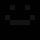

In [29]:
output_img = convert_param_to_imageArr(param_updated)
binary_array_to_png_and_display(output_img,scale_factor=5)

In [30]:
# !pip install opencv-python


In [31]:
import cv2
import numpy as np

def enhance_edges(image, edge_factor=1.5, contrast_factor=2.0):
    # Convert image to grayscale if it's not already (assuming image is in grayscale)
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Use the Sobel operator to find edges in the image
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate the magnitude of the gradients
    sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    # Normalize and scale the magnitude to enhance edges
    sobel_normalized = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)
    edges_enhanced = np.clip(sobel_normalized * edge_factor, 0, 255).astype(np.uint8)
    
    # Combine the edge-enhanced image with the original image to increase edge contrast
    enhanced_image = cv2.addWeighted(gray.astype(np.uint8), contrast_factor, edges_enhanced, 1, 0)
    
    # Clip values to ensure they stay within [0, 255]
    enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)
    
    return enhanced_image


# Load an image (replace 'path_to_image' with your actual image path)
# image_path = 'path_to_image.jpg'
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



In [32]:
# enhanced_image = enhance_edges(image=output_img)

In [33]:
# # Enhance edges in the image
# 
# print(enhance_edges)
# # Display the original and enhanced images
# cv2.imshow('Original Image', output_img)
# cv2.imshow('Enhanced Image', enhanced_image)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

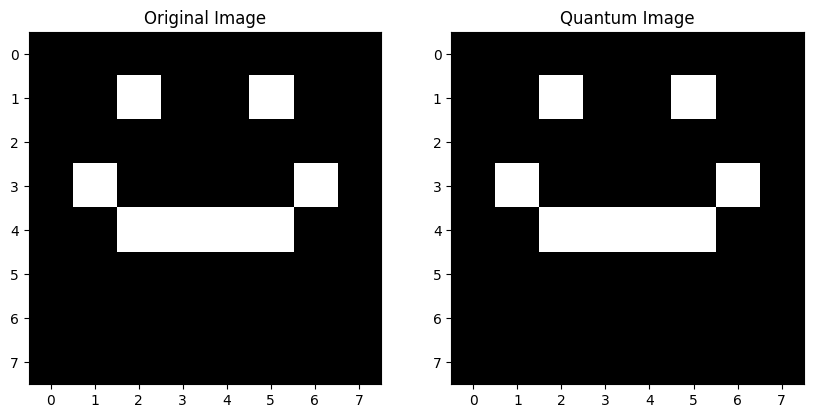

In [34]:
import matplotlib.pyplot as plt

# Display the original and enhanced images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(init_patern, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output_img, cmap='gray')
plt.title('Quantum Image')

plt.show()